<a href="https://colab.research.google.com/github/Adharsh0001/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
candidates = {"gmat": [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,600,550,550,570,670,710,720,690,650,640,770,640,630,690,710,600,750,700],"gpa" : [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,3.1,1.7,2.7,3.7,3.7,3.3,3.3,2.7,3.7,2.7,2.3,3.3,2,2.2,2.3,2.7,3,3.3,3.7,2.3,3.3,3,2.3,3.3,3.5,3.6,3,2,2.5,3.4,4],"work_experience": [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],"admitted":[1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]}

In [ ]:
df = pd.DataFrame(candidates, columns = ["gmat","gpa","work_experience","admitted"])
df

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,3.1,1,0


In [ ]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.00000,40.000000,40.000000,40.000000
mean,666.75000,3.075000,3.425000,0.475000
std,65.37417,0.626652,1.737778,0.505736
min,540.00000,1.700000,1.000000,0.000000
25%,610.00000,2.650000,2.000000,0.000000
50%,685.00000,3.300000,4.000000,0.000000
75%,710.00000,3.625000,5.000000,1.000000
max,780.00000,4.000000,6.000000,1.000000


In [ ]:
df.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

In [ ]:
df =df.drop_duplicates()

EDA

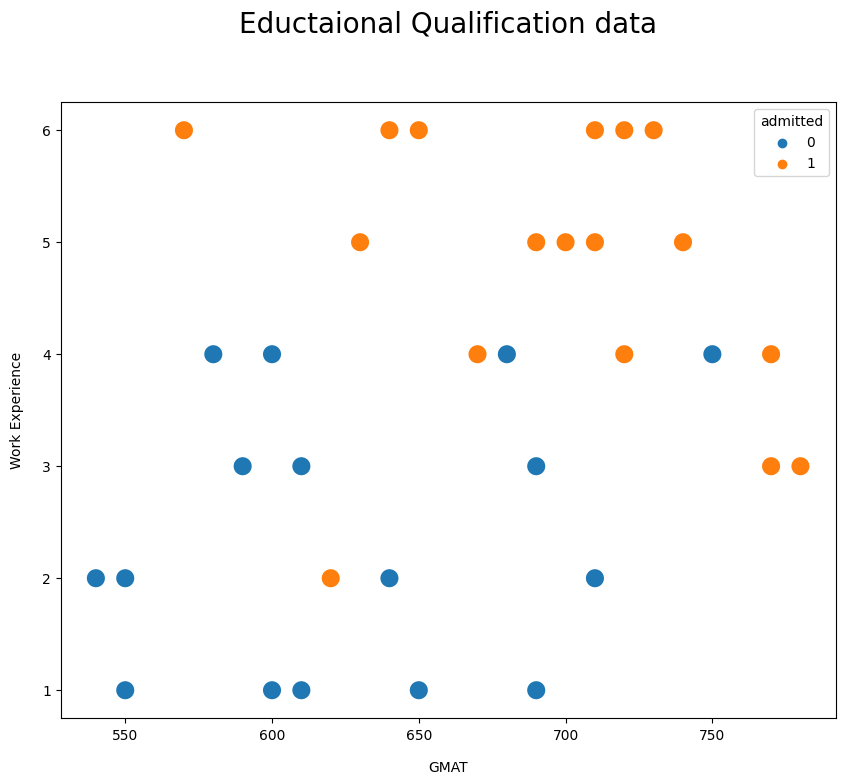

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.scatterplot(x = "gmat",y = "work_experience", hue = "admitted", data =df, s = 200)
plt.title("Eductaional Qualification data", y = 1.1015, fontsize = 20)
plt.xlabel("GMAT", labelpad = 13)
plt.ylabel("Work Experience", labelpad = 13)
ax = plt.gca

due to the data that i have taken, the points are spreading. But as per the original data it follows an linear decision boundary

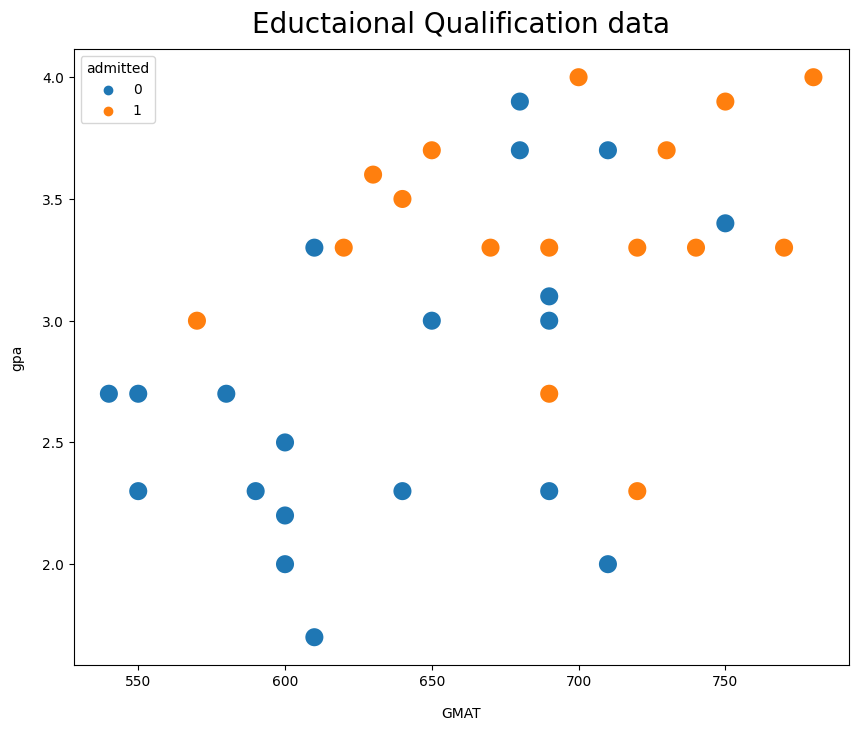

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.scatterplot(x = "gmat",y = "gpa", hue = "admitted", data =df, s = 200)
plt.title("Eductaional Qualification data", y = 1.015, fontsize = 20)
plt.xlabel("GMAT", labelpad = 13)
plt.ylabel("gpa", labelpad = 13)
ax = plt.gca

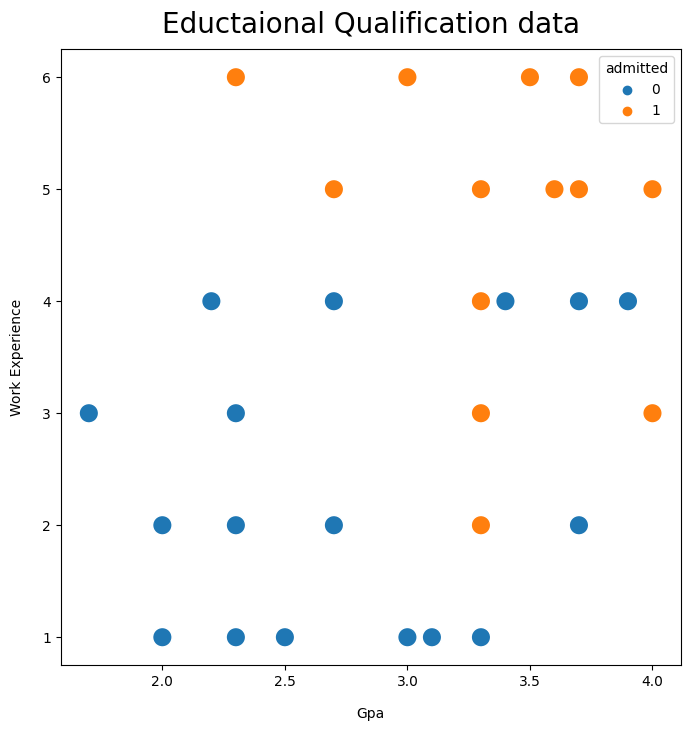

In [ ]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.scatterplot(x = "gpa",y = "work_experience", hue = "admitted", data =df, s = 200)
plt.title("Eductaional Qualification data", y = 1.015, fontsize = 20)
plt.xlabel("Gpa", labelpad = 13)
plt.ylabel("Work Experience", labelpad = 13)
ax = plt.gca

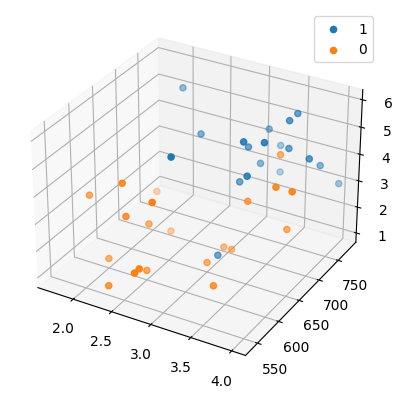

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ="3d")
for s in df.admitted.unique():
  ax.scatter(df.gpa[df.admitted == s],df.gmat[df.admitted == s], df["work_experience"][df.admitted == s], label =s)
ax.legend()

In [ ]:
X = df[["gmat","gpa","work_experience"]].values
Y = df["admitted"].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state =0)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
regressor.predict([[700,4,3]])

array([0])

In [ ]:
regressor.predict_proba([[700,4,3]])

array([[0.61841539, 0.38158461]])

In [ ]:
regressor.predict_proba(X_test)

array([[0.86202849, 0.13797151],
       [0.98150276, 0.01849724],
       [0.33344322, 0.66655678],
       [0.37589069, 0.62410931],
       [0.96227169, 0.03772831],
       [0.99655031, 0.00344969],
       [0.02122852, 0.97877148],
       [0.1398668 , 0.8601332 ]])

In [ ]:
regressor.coef_

array([[0.02241993, 0.32098472, 1.47035195]])

In [ ]:
regressor.intercept_

array([-21.87177172])

Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score # plot_roc_curve
# regressor.score(X_test, Y_test) #accuracy
# confusion_matrix(Y_test, Y_pred)
f1_score(Y_test, Y_pred)
# plot_roc_curve(regressor,X_test, Y_test)


0.75